Text(0.5, 1.0, 'Random Classification Data with 2 classes')

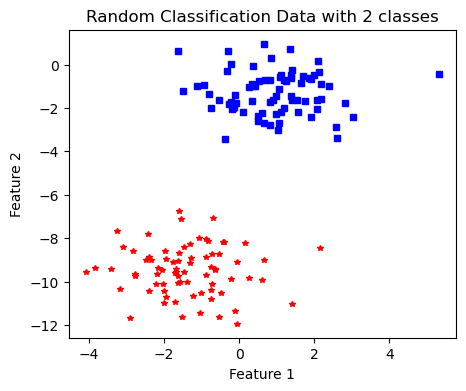

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
X, y = datasets.make_blobs(n_samples=150, n_features=2, centers=2, 
                           cluster_std=1.05, random_state=2)
#Plotting
X.shape 
fig = plt.figure(figsize=(5,4))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "r*", markersize=4)
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs', markersize=4) 
plt.xlabel("Feature 1") 
plt.ylabel("Feature 2") 
plt.title('Random Classification Data with 2 classes')

In [2]:
def perceptron(X, y, lr, epochs):
    m, n = X.shape
    theta = np.zeros((n+1,1))
    n_miss_list = []
    for epoch in range(epochs):
        n_miss = 0
        for idx, x_i in enumerate(X):
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)
            y_hat = step_func(np.dot(x_i.T, theta))
            if (np.squeeze(y_hat) - y[idx]) != 0:
                theta += lr*((y[idx] - y_hat)*x_i)
                n_miss += 1
        n_miss_list.append(n_miss)
    return theta, n_miss_list

In [3]:
def step_func(z):
    return 1.0 if (z>0) else 0.0

In [4]:
def plot_decision_boundary(X, theta):
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -theta[1]/theta[2]
    c = -theta[0]/theta[2] 
    x2 = m*x1 + c
    fig = plt.figure(figsize=(5,4))
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "r*", markersize=4)
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs', markersize=4) 
    plt.xlabel("Feature 1") 
    plt.ylabel("Feature 2") 
    plt.title('Perceptron Algorithm')
    plt.plot(x1, x2,"y-")

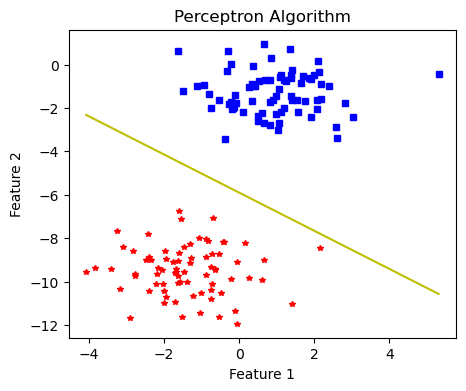

In [5]:
theta, miss_1 = perceptron(X, y , 0.5, 100)
plot_decision_boundary(X, theta)